# Exploring Weather Trends - Project Instructions

## Summary

In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

### Extract the data from the database to CSV

Udacity Sugesstion :

Open up the CSV in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R

I used Python, thought it was not yet covered, but tried to explore with my immature internet search and refered the great book "Python for Data Ananlysis - Wes McKinney"

In [525]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  

### Loaging the data from CSV to Pandas DataFrame

In [526]:
df_city_data = pd.read_csv('city_data.csv')
df_global_data = pd.read_csv('global_data.csv')
df_city_list = pd.read_csv('city_list.csv')

In [581]:
df_city_data.head() 

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [528]:
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [529]:
df_city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [530]:
# My City's Temperature Data (Pune, India)
df_my_city_data = df_city_data[df_city_data.city == 'Pune'] 

In [531]:
type(df_my_city_data)

pandas.core.frame.DataFrame

In [532]:
df_my_city_data.head()

,year,city,country,avg_temp
52868,1796,Pune,India,24.39
52869,1797,Pune,India,25.17
52870,1798,Pune,India,24.05
52871,1799,Pune,India,24.68
52872,1800,Pune,India,24.67


In [533]:
df_my_city_data.index = range(len(df_my_city_data))

In [534]:
df_my_city_data.head()

,year,city,country,avg_temp
0,1796,Pune,India,24.39
1,1797,Pune,India,25.17
2,1798,Pune,India,24.05
3,1799,Pune,India,24.68
4,1800,Pune,India,24.67


In [535]:
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [536]:
type([df_my_city_data.year])

list

In [537]:
list_my_city_year = list(df_my_city_data['year'])

In [538]:
df_my_global_data = df_global_data.loc[df_global_data['year'].isin(list_my_city_year)]

In [539]:
df_my_global_data.index = range(len(df_my_global_data))

In [540]:
df_my_city_data.tail()

,year,city,country,avg_temp
213,2009,Pune,India,25.87
214,2010,Pune,India,25.75
215,2011,Pune,India,25.16
216,2012,Pune,India,25.30
217,2013,Pune,India,25.85


In [541]:
df_my_global_data.tail()

,year,avg_temp
213,2009,9.51
214,2010,9.70
215,2011,9.52
216,2012,9.51
217,2013,9.61


In [542]:
len(df_my_global_data) == len(df_my_city_data)

True

In [543]:
df_my_global_data.rename(columns={'avg_temp':'global_avg_temp'}, inplace=True)

In [544]:
df_my_global_data.head()

,year,global_avg_temp
0,1796,8.27
1,1797,8.51
2,1798,8.67
3,1799,8.51
4,1800,8.48


In [545]:
df = pd.merge(df_my_city_data, df_my_global_data, on='year')

In [546]:
len(df) == len(df_my_city_data) 

True

In [547]:
df.head()

,year,city,country,avg_temp,global_avg_temp
0,1796,Pune,India,24.39,8.27
1,1797,Pune,India,25.17,8.51
2,1798,Pune,India,24.05,8.67
3,1799,Pune,India,24.68,8.51
4,1800,Pune,India,24.67,8.48


In [548]:
df.rename(columns={'avg_temp': "city_avg_temp"}, inplace=True)

In [549]:
df['moving_avg_global'] = df['global_avg_temp'].rolling(window=2).mean()
df['moving_avg_my_city'] = df['city_avg_temp'].rolling(window=2).mean()

In [550]:
df.head()

,year,city,country,city_avg_temp,global_avg_temp,moving_avg_global,moving_avg_my_city
0,1796,Pune,India,24.39,8.27,NaN,NaN
1,1797,Pune,India,25.17,8.51,8.390,24.780
2,1798,Pune,India,24.05,8.67,8.590,24.610
3,1799,Pune,India,24.68,8.51,8.590,24.365
4,1800,Pune,India,24.67,8.48,8.495,24.675


In [551]:
df.to_csv("final_pune_vs_global_with_NaN.csv")

In [552]:
df.dropna(axis=0, inplace=True)

In [553]:
df.head()

,year,city,country,city_avg_temp,global_avg_temp,moving_avg_global,moving_avg_my_city
1,1797,Pune,India,25.17,8.51,8.390,24.780
2,1798,Pune,India,24.05,8.67,8.590,24.610
3,1799,Pune,India,24.68,8.51,8.590,24.365
4,1800,Pune,India,24.67,8.48,8.495,24.675
5,1801,Pune,India,23.94,8.59,8.535,24.305


## Saving the DataFram to a CVS

In [554]:
df.to_csv("final_pune_vs_global_without_NaN.csv")

## Ploting the Line Chart

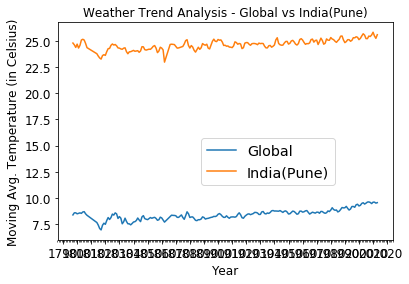

In [555]:
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.rc('font', size=12)         
plt.rc('axes', titlesize=12)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)    
plt.rc('figure', titlesize=12)  

plt.plot(df.year, df.moving_avg_global)
plt.plot(df.year, df.moving_avg_my_city)
plt.xlabel("Year")
plt.ylabel("Moving Avg. Temperature (in Celsius)")
plt.title("Weather Trend Analysis - Global vs India(Pune)")
plt.legend(["Global", "India(Pune)"], bbox_to_anchor=(.85,0.5), fontsize='large')
plt.rcParams["figure.figsize"] = [20,10]

## Saving the Line Chart in PNG File 

plt.savefig("Temp_Analysis_Global_India")
plt.show()

## Calculating the Correlation Coefficient

In [556]:
df['moving_avg_my_city'].corr(df['moving_avg_global'], method='pearson')

0.87091571502482812

In [557]:
df[['moving_avg_my_city', 'moving_avg_global']].corr()

,moving_avg_my_city,moving_avg_global
moving_avg_my_city,1.000000,0.870916
moving_avg_global,0.870916,1.000000


# Now making it more generic functions

In [558]:
def mycity_to_global(city_df, global_df, city='Pune'):
    df_my_city_data = city_df[city_df.city == city] 
    list_my_city_year = list(df_my_city_data['year'])
    
    df_my_global_data = global_df.loc[global_df['year'].isin(list_my_city_year)]
    df_my_global_data.index = range(len(df_my_global_data))
    df_my_global_data.rename(columns={'avg_temp':'global_avg_temp'}, inplace=True)
    
    df = pd.merge(df_my_city_data, df_my_global_data, on='year')
    df.rename(columns={'avg_temp': "city_avg_temp"}, inplace=True)
    
    city_col = 'moving_avg_temp_{}'.format(city.lower())

    df['moving_avg_global'] = df['global_avg_temp'].rolling(window=2).mean()
    df[city_col] = df['city_avg_temp'].rolling(window=2).mean()
    
    df.dropna(axis=0, inplace=True)
    
    # Calculating the Coff. of Correlation
    
    coff = df[[city_col, 'moving_avg_global']].corr()
    
    return df, coff

In [559]:
df_city_data = pd.read_csv('city_data.csv')
df_global_data = pd.read_csv('global_data.csv')
df_city_list = pd.read_csv('city_list.csv')

In [560]:
df_pune, c_pune = mycity_to_global(df_city_data, df_global_data, city='Pune')
df_astana, c_astana = mycity_to_global(df_city_data, df_global_data, city='Astana')


In [561]:
df3.head()

,year,city,country,bern_avg_temp,global_avg_temp,moving_avg_global,moving_avg_bern
1,1751,Bern,Switzerland,7.73,7.98,8.350,7.670
2,1752,Bern,Switzerland,2.86,5.78,6.880,5.295
3,1753,Bern,Switzerland,6.83,8.39,7.085,4.845
4,1754,Bern,Switzerland,6.55,8.47,8.430,6.690
5,1755,Bern,Switzerland,6.21,8.36,8.415,6.380


In [562]:
df_city_data = pd.read_csv('city_data.csv')
df_global_data = pd.read_csv('global_data.csv')
df_city_list = pd.read_csv('city_list.csv')

def manycity_to_globle(city_df, global_df, cities=['Pune']):
    city_dfs = []
    city_crr = []
    for city in cities:
        _df, _crr = mycity_to_global(city_df, global_df, city=city)
        city_dfs.append(_df)
        city_crr.append(_crr)
    
    for d in city_dfs:
        global_df = global_df.merge(d, on='year')
        
    return global_df
        

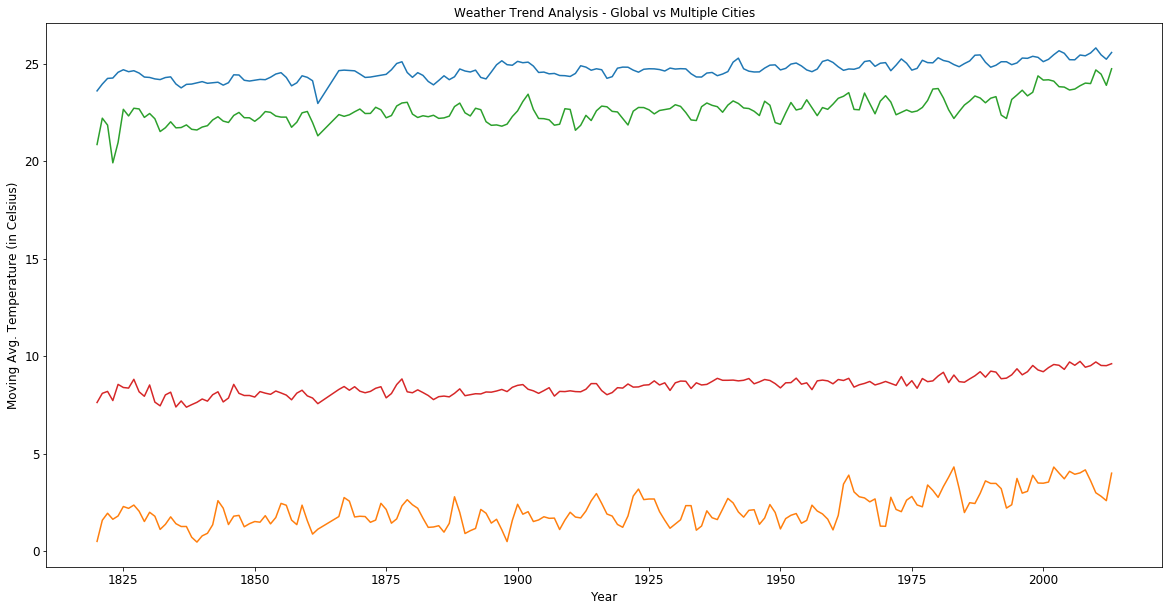

In [563]:
df_final = manycity_to_globle(df_city_data, df_global_data, ['Pune', 'Astana', 'Baghdad'] )

for c in col:
    plt.plot(df_final['year'], df_final[c])

plt.xlabel("Year")
plt.ylabel("Moving Avg. Temperature (in Celsius)")
plt.title("Weather Trend Analysis - Global vs Multiple Cities")
plt.rcParams["figure.figsize"] = [20,10]


In [564]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline  

In [565]:
def manycity_to_globle(city_df, global_df, cities=['Pune']):
    city_dfs = []
    city_crr = []
    for city in cities:
        _df, _crr = mycity_to_global(city_df, global_df, city=city)
        city_dfs.append(_df)
        city_crr.append(_crr)
    
    for d in city_dfs:
        global_df = global_df.merge(d, on='year')
    
    dup_column = [i for i in global_df.columns if i.startswith('moving_avg_global_') or i.startswith('global_avg_temp_')]
    print(dup_column)
    global_df.drop(dup_column, axis=1, inplace=True)
    
    return global_df

In [566]:
def mycity_to_global(city_df, global_df, city='Pune'):
    '''
    It takes all city temperature, the global temperature and one city name(mycity) and 
    Returns:
    1. DataFram which contains which contains both the global temperature and the city temperature
    2. DataFram with the coff of coff correlation between the global temperature and city temperature 
    
    '''
    df_my_city_data = city_df[city_df.city == city] 
    list_my_city_year = list(df_my_city_data['year'])
    
    df_my_global_data = global_df.loc[global_df['year'].isin(list_my_city_year)]
    df_my_global_data.index = range(len(df_my_global_data))
    df_my_global_data.rename(columns={'avg_temp':'global_avg_temp'}, inplace=True)
    
    df = pd.merge(df_my_city_data, df_my_global_data, on='year')
    df.rename(columns={'avg_temp': "{}_avg_temp".format(city.lower())}, inplace=True)
    
    city_col = 'moving_avg_{}'.format(city.lower())

    df['moving_avg_global'] = df['global_avg_temp'].rolling(window=2).mean()
    df[city_col] = df['{}_avg_temp'.format(city.lower())].rolling(window=2).mean()
    
    df.dropna(axis=0, inplace=True)
    
    # Calculating the Coff. of Correlation
    coff = df[[city_col, 'moving_avg_global']].corr()
    
    return df, coff

In [567]:
# Pune
df1, c_pune = mycity_to_global(df_city_data, df_global_data, city='Pune')
# Baghdad
df2, c_baghdad = mycity_to_global(df_city_data, df_global_data, city='Baghdad')
# Bern
df3, c_bern = mycity_to_global(df_city_data, df_global_data, city='Bern')

In [568]:
df1.head()

,year,city,country,pune_avg_temp,global_avg_temp,moving_avg_global,moving_avg_pune
1,1797,Pune,India,25.17,8.51,8.390,24.780
2,1798,Pune,India,24.05,8.67,8.590,24.610
3,1799,Pune,India,24.68,8.51,8.590,24.365
4,1800,Pune,India,24.67,8.48,8.495,24.675
5,1801,Pune,India,23.94,8.59,8.535,24.305


In [569]:
df2.head()

,year,city,country,baghdad_avg_temp,global_avg_temp,moving_avg_global,moving_avg_baghdad
1,1820,Baghdad,Iraq,21.58,7.62,7.495,20.855
2,1821,Baghdad,Iraq,22.83,8.09,7.855,22.205
3,1822,Baghdad,Iraq,20.87,8.19,8.140,21.850
4,1823,Baghdad,Iraq,18.96,7.72,7.955,19.915
5,1824,Baghdad,Iraq,22.96,8.55,8.135,20.960


In [570]:
df3.head()

,year,city,country,bern_avg_temp,global_avg_temp,moving_avg_global,moving_avg_bern
1,1751,Bern,Switzerland,7.73,7.98,8.350,7.670
2,1752,Bern,Switzerland,2.86,5.78,6.880,5.295
3,1753,Bern,Switzerland,6.83,8.39,7.085,4.845
4,1754,Bern,Switzerland,6.55,8.47,8.430,6.690
5,1755,Bern,Switzerland,6.21,8.36,8.415,6.380


In [571]:
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [572]:
df = manycity_to_globle(df_city_data, df_global_data, ['Pune', 'Bern', 'Baghdad'])

['global_avg_temp_x', 'moving_avg_global_x', 'global_avg_temp_y', 'moving_avg_global_y']


In [573]:
df.head()

,year,avg_temp,city_x,country_x,pune_avg_temp,moving_avg_pune,city_y,country_y,bern_avg_temp,moving_avg_bern,city,country,baghdad_avg_temp,global_avg_temp,moving_avg_global,moving_avg_baghdad
0,1820,7.62,Pune,India,23.67,23.605,Bern,Switzerland,6.13,6.640,Baghdad,Iraq,21.58,7.62,7.495,20.855
1,1821,8.09,Pune,India,24.24,23.955,Bern,Switzerland,6.83,6.480,Baghdad,Iraq,22.83,8.09,7.855,22.205
2,1822,8.19,Pune,India,24.25,24.245,Bern,Switzerland,8.09,7.460,Baghdad,Iraq,20.87,8.19,8.140,21.850
3,1823,7.72,Pune,India,24.28,24.265,Bern,Switzerland,6.42,7.255,Baghdad,Iraq,18.96,7.72,7.955,19.915
4,1824,8.55,Pune,India,24.84,24.560,Bern,Switzerland,7.11,6.765,Baghdad,Iraq,22.96,8.55,8.135,20.960


In [574]:
dup_column

['global_avg_temp_x',
 'moving_avg_global_x',
 'global_avg_temp_y',
 'moving_avg_global_y']

In [575]:
df.head()

,year,avg_temp,city_x,country_x,pune_avg_temp,moving_avg_pune,city_y,country_y,bern_avg_temp,moving_avg_bern,city,country,baghdad_avg_temp,global_avg_temp,moving_avg_global,moving_avg_baghdad
0,1820,7.62,Pune,India,23.67,23.605,Bern,Switzerland,6.13,6.640,Baghdad,Iraq,21.58,7.62,7.495,20.855
1,1821,8.09,Pune,India,24.24,23.955,Bern,Switzerland,6.83,6.480,Baghdad,Iraq,22.83,8.09,7.855,22.205
2,1822,8.19,Pune,India,24.25,24.245,Bern,Switzerland,8.09,7.460,Baghdad,Iraq,20.87,8.19,8.140,21.850
3,1823,7.72,Pune,India,24.28,24.265,Bern,Switzerland,6.42,7.255,Baghdad,Iraq,18.96,7.72,7.955,19.915
4,1824,8.55,Pune,India,24.84,24.560,Bern,Switzerland,7.11,6.765,Baghdad,Iraq,22.96,8.55,8.135,20.960


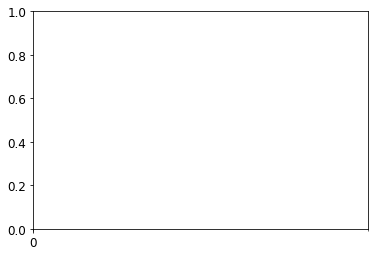

In [576]:
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.rc('font', size=12)         
plt.rc('axes', titlesize=12)     
plt.rc('axes', labelsize=12)    
plt.rc('xtick', labelsize=12)   
plt.rc('ytick', labelsize=12)    
plt.rc('legend', fontsize=12)    
plt.rc('figure', titlesize=12) 

In [577]:
def gen_charts(df, cities):
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

    plt.rc('font', size=12)         
    plt.rc('axes', titlesize=12)     
    plt.rc('axes', labelsize=12)    
    plt.rc('xtick', labelsize=12)   
    plt.rc('ytick', labelsize=12)    
    plt.rc('legend', fontsize=12)    
    plt.rc('figure', titlesize=12)  

    plt.plot(df.year, df.moving_avg_global)
    for c in cities:
        plt.plot(df.year, df['moving_avg_{}'.format(c.lower())])

    cities.insert(0, 'Global')
    plt.legend(cities, bbox_to_anchor=(.85,0.5), fontsize='large')

        
    plt.xlabel("Year")
    plt.ylabel("Moving Avg. Temperature (in Celsius)")
    plt.title("Weather Trend Analysis - Global vs Multiple Cities")
    #plt.legend(["Global", "India(Pune)"], bbox_to_anchor=(.85,0.5), fontsize='large')
    plt.rcParams["figure.figsize"] = [20,10]

    return plt

<module 'matplotlib.pyplot' from '/Users/dsuman/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

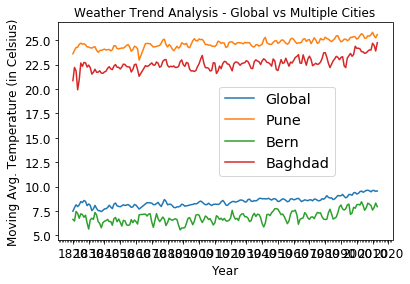

In [578]:
gen_charts(df, cities=['Pune', 'Bern', 'Baghdad'])

In [579]:
df

,year,avg_temp,city_x,country_x,pune_avg_temp,moving_avg_pune,city_y,country_y,bern_avg_temp,moving_avg_bern,city,country,baghdad_avg_temp,global_avg_temp,moving_avg_global,moving_avg_baghdad
0,1820,7.62,Pune,India,23.67,23.605,Bern,Switzerland,6.13,6.640,Baghdad,Iraq,21.58,7.62,7.495,20.855
1,1821,8.09,Pune,India,24.24,23.955,Bern,Switzerland,6.83,6.480,Baghdad,Iraq,22.83,8.09,7.855,22.205
2,1822,8.19,Pune,India,24.25,24.245,Bern,Switzerland,8.09,7.460,Baghdad,Iraq,20.87,8.19,8.140,21.850
3,1823,7.72,Pune,India,24.28,24.265,Bern,Switzerland,6.42,7.255,Baghdad,Iraq,18.96,7.72,7.955,19.915
4,1824,8.55,Pune,India,24.84,24.560,Bern,Switzerland,7.11,6.765,Baghdad,Iraq,22.96,8.55,8.135,20.960
5,1825,8.39,Pune,India,24.54,24.690,Bern,Switzerland,7.33,7.220,Baghdad,Iraq,22.36,8.39,8.470,22.660
6,1826,8.36,Pune,India,24.64,24.590,Bern,Switzerland,6.95,7.140,Baghdad,Iraq,22.28,8.36,8.375,22.320
7,1827,8.81,Pune,India,24.64,24.640,Bern,Switzerland,6.78,6.865,Baghdad,Iraq,23.15,8.81,8.585,22.715
8,1828,8.17,Pune,India,24.40,24.520,Bern,Switzerland,7.38,7.080,Baghdad,Iraq,22.21,8.17,8.490,22.680
9,1829,7.94,Pune,India,24.23,24.315,Bern,Switzerland,5.16,6.270,Baghdad,Iraq,22.28,7.94,8.055,22.245


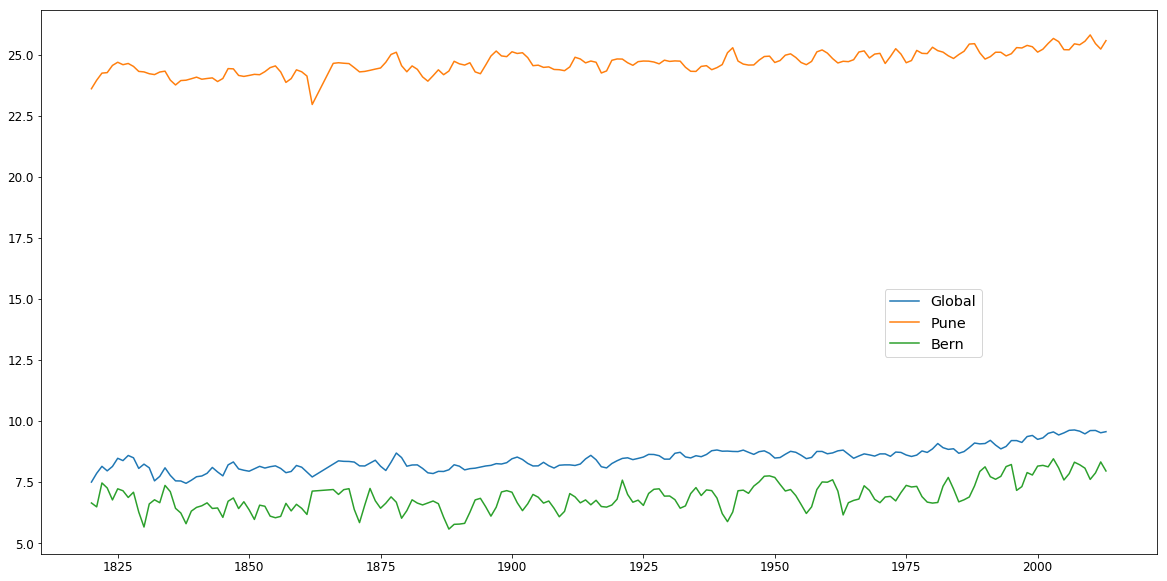

In [580]:
plt.plot(df.year, df.moving_avg_global)
for c in ['Pune', 'Bern']:
    plt.plot(df.year, df['moving_avg_{}'.format(c.lower())])

legends = ['Global', 'Pune', 'Bern']
plt.legend(legends, bbox_to_anchor=(.85,0.5), fontsize='large')